In [1]:
!pip install wordcloud matplotlib pandas numpy



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

# Load dataset (replace with your file)
df = pd.read_csv(r"C:\Users\sahad\Downloads\data.csv")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df = df[numerical_cols].dropna()



In [4]:
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

In [5]:
def categorize(value, col_min, col_max):
    bins = np.linspace(col_min, col_max, 5)  # Divide into 5 categories
    labels = ["Very Low", "Low", "Medium", "High", "Very High"]
    return labels[np.digitize(value, bins) - 1]

# Convert each numerical column into text
text_data = []
for col in numerical_cols:
    col_min, col_max = df[col].min(), df[col].max()
    df[col + "_category"] = df[col].apply(lambda x: categorize(x, col_min, col_max))
    text_data.extend(df[col + "_category"].values)

# Merge into a single text corpus
text = " ".join(text_data)


In [6]:
print(text)

Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low Very Low V

In [7]:
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  ...  sqft_living_category  \
0              0     0          3  

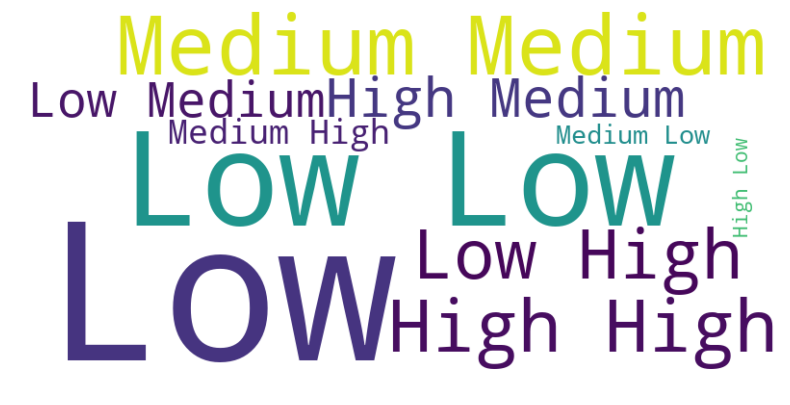

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()
